In [2]:
from matplotlib import pyplot as plt
import numpy as np

[-0.010331]
post relaxation propagation energy difference: [-0.008188 -0.006358 -0.005747 -0.005507 -0.005993 -0.00612  -0.042413
 -0.005872 -0.005819 -0.005969 -0.005685 -0.006587 -0.007064 -0.006439
 -0.007633 -0.006069 -0.006201 -0.005396 -0.006633 -0.007198 -0.006659
 -0.006692 -0.006564 -0.006281 -0.006761 -0.005958 -0.006158 -0.004914
 -0.006733 -0.006307]
energy difference error: [5.2000e-05 1.7200e-04 2.4300e-04 4.5200e-04 3.5000e-04 1.8500e-04
 2.1069e-02 4.1400e-04 3.8500e-04 9.6900e-04 9.2200e-04 4.5500e-04
 3.7100e-04 4.2100e-04 4.9000e-04 5.4400e-04 7.4100e-04 4.9200e-04
 3.2600e-04 2.6700e-04 3.0900e-04 5.0300e-04 4.0300e-04 3.8800e-04
 2.6200e-04 4.0700e-04 5.1200e-04 8.2800e-04 3.6400e-04 5.4500e-04]
uncorrelated afqmc energy error: 0.0019502384765517759


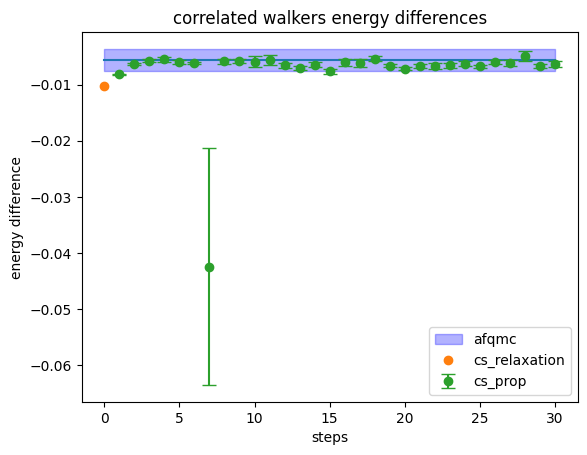

In [3]:
rlx_data = '''
# relaxation from mean-field object using 100 walkers
# rlx_step       system1_en      system2_en      en_diff
    0            -0.762049       -0.751719       -0.010331
# relaxation time: 3.55
'''

prop_data = '''
# multiple independent post relaxation propagation
# tot_walkers: 100, propagation steps: 30, number of independent runs: 100
# step   system1_en      error           system2_en      error           energy_diff     error
  1      -0.798097       0.000564        -0.789909       0.000610        -0.008188       0.000052
  2      -0.824431       0.001350        -0.818073       0.001498        -0.006358       0.000172
  3      -0.838798       0.001761        -0.833051       0.001957        -0.005747       0.000243
  4      -0.856046       0.004395        -0.850539       0.004798        -0.005507       0.000452
  5      -0.863193       0.004247        -0.857200       0.004500        -0.005993       0.000350
  6      -0.868166       0.003161        -0.862046       0.003236        -0.006120       0.000185
  7      -0.904072       0.021006        -0.861659       0.003093        -0.042413       0.021069
  8      -0.868161       0.003836        -0.862289       0.004137        -0.005872       0.000414
  9      -0.872364       0.005189        -0.866545       0.005518        -0.005819       0.000385
  10     -0.885536       0.015088        -0.879567       0.015963        -0.005969       0.000969
  11     -0.873290       0.004958        -0.867606       0.005775        -0.005685       0.000922
  12     -0.866392       0.002765        -0.859805       0.002990        -0.006587       0.000455
  13     -0.875608       0.007050        -0.868545       0.006903        -0.007064       0.000371
  14     -0.868849       0.002773        -0.862409       0.002848        -0.006439       0.000421
  15     -0.867830       0.003478        -0.860198       0.003542        -0.007633       0.000490
  16     -0.870915       0.003861        -0.864846       0.004223        -0.006069       0.000544
  17     -0.869940       0.005467        -0.863739       0.005656        -0.006201       0.000741
  18     -0.883032       0.005176        -0.877636       0.005389        -0.005396       0.000492
  19     -0.870222       0.003300        -0.863589       0.003436        -0.006633       0.000326
  20     -0.867022       0.002737        -0.859824       0.002802        -0.007198       0.000267
  21     -0.865629       0.002965        -0.858970       0.003138        -0.006659       0.000309
  22     -0.872579       0.004718        -0.865887       0.004658        -0.006692       0.000503
  23     -0.868153       0.003582        -0.861589       0.003798        -0.006564       0.000403
  24     -0.879884       0.004013        -0.873604       0.004297        -0.006281       0.000388
  25     -0.869631       0.003312        -0.862870       0.003288        -0.006761       0.000262
  26     -0.874239       0.004611        -0.868281       0.004897        -0.005958       0.000407
  27     -0.874534       0.004856        -0.868376       0.005180        -0.006158       0.000512
  28     -0.870103       0.004187        -0.865189       0.004670        -0.004914       0.000828
  29     -0.879902       0.004112        -0.873169       0.004273        -0.006733       0.000364
  30     -0.884017       0.006341        -0.877710       0.006700        -0.006307       0.000545
# total run time: 87.56
'''

rlx_en_diff = []
lines = rlx_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 3:
            rlx_en_diff.append(columns[3])

rlx_en_diff = np.array(rlx_en_diff,dtype='float32')
print(f'{rlx_en_diff}')

prop_en_diff = []
prop_en_diff_err = []
lines = prop_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 5:
            prop_en_diff.append(columns[5])
        if len(columns) > 6:
            prop_en_diff_err.append(columns[6])

prop_en_diff = np.array(prop_en_diff,dtype='float32')
print(f'post relaxation propagation energy difference: {prop_en_diff}')
prop_en_diff_err = np.array(prop_en_diff_err,dtype='float32')
print(f'energy difference error: {prop_en_diff_err}')

rlx_steps = np.arange(len(rlx_en_diff))
prop_steps = np.arange(len(rlx_en_diff),len(rlx_en_diff)+len(prop_en_diff))

afqmc_en_diff = -0.005606581337333716
afqmc_en_diff_err = 0.0019502384765517759
print(f'uncorrelated afqmc energy error: {afqmc_en_diff_err}')
x_steps = np.linspace(0,max(prop_steps),100)
afqmc_en = np.array([afqmc_en_diff]*len(x_steps))
afqmc_lw = afqmc_en-afqmc_en_diff_err
afqmc_up = afqmc_en+afqmc_en_diff_err
plt.plot(x_steps,afqmc_en)
plt.fill_between(x_steps, afqmc_lw, afqmc_up, color='blue', alpha=0.3, label='afqmc')
plt.plot(rlx_steps,rlx_en_diff,'o',label='cs_relaxation')
plt.errorbar(prop_steps,prop_en_diff,yerr=prop_en_diff_err, fmt='o', capsize=5,label='cs_prop')
plt.xlabel('steps')
plt.ylabel('energy difference')
plt.title('correlated walkers energy differences')
plt.legend()
plt.show()

[-0.010331]
post relaxation propagation energy difference: [-0.009282 -0.008094 -0.007089 -0.006403 -0.005893 -0.00695  -0.006291
 -0.005837 -0.004045 -0.006252 -0.00499  -0.002475 -0.005236 -0.003174
 -0.00426  -0.000942 -0.004238 -0.002577 -0.005507 -0.004675]
energy difference error: [8.100e-05 1.800e-04 3.270e-04 9.820e-04 9.820e-04 1.158e-03 1.177e-03
 1.303e-03 1.261e-03 1.392e-03 1.139e-03 2.497e-03 2.353e-03 1.451e-03
 2.257e-03 2.285e-03 1.734e-03 1.733e-03 1.467e-03 1.966e-03]
uncorrelated afqmc energy error: 0.0019502384765517759


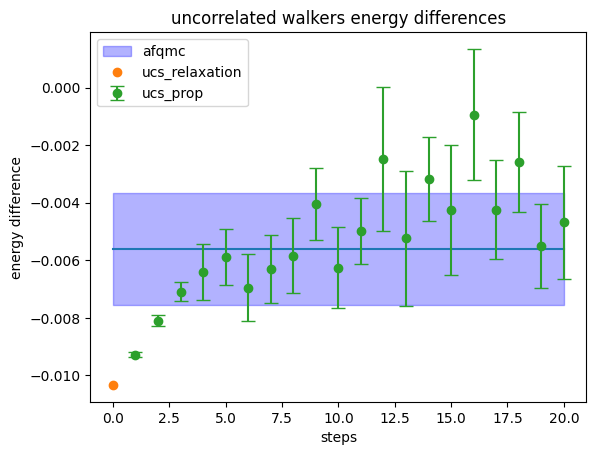

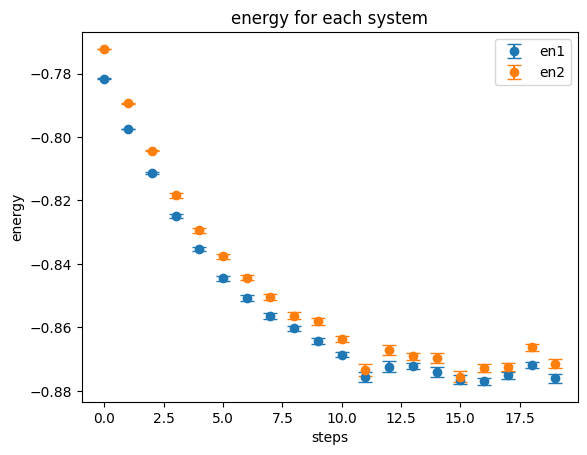

In [13]:
rlx_data = '''
# relaxation from mean-field object using 100 walkers
# rlx_step       system1_en      system2_en      en_diff
    0            -0.762049       -0.751719       -0.010331
# relaxation time: 3.55
'''

prop_data = '''
# multiple independent post relaxation propagation
# uncorrelated sampling
# tot_walkers: 400, propagation steps: 20, number of independent runs: 400
# step   system1_en      error           system2_en      error           energy_diff     error
  1      -0.781593       0.000056        -0.772311       0.000060        -0.009282       0.000081
  2      -0.797462       0.000125        -0.789368       0.000141        -0.008094       0.000180
  3      -0.811361       0.000230        -0.804272       0.000236        -0.007089       0.000327
  4      -0.824830       0.000608        -0.818427       0.000759        -0.006403       0.000982
  5      -0.835348       0.000650        -0.829455       0.000743        -0.005893       0.000982
  6      -0.844478       0.000821        -0.837528       0.000789        -0.006950       0.001158
  7      -0.850650       0.000876        -0.844359       0.000829        -0.006291       0.001177
  8      -0.856345       0.000935        -0.850508       0.000958        -0.005837       0.001303
  9      -0.860296       0.000768        -0.856251       0.000979        -0.004045       0.001261
  10     -0.864315       0.000941        -0.858063       0.001058        -0.006252       0.001392
  11     -0.868591       0.000778        -0.863601       0.000909        -0.004990       0.001139
  12     -0.875737       0.001551        -0.873262       0.001892        -0.002475       0.002497
  13     -0.872391       0.001771        -0.867155       0.001562        -0.005236       0.002353
  14     -0.872281       0.000927        -0.869107       0.001196        -0.003174       0.001451
  15     -0.873974       0.001538        -0.869714       0.001648        -0.004260       0.002257
  16     -0.876438       0.001392        -0.875495       0.001752        -0.000942       0.002285
  17     -0.876959       0.001157        -0.872722       0.001274        -0.004238       0.001734
  18     -0.875055       0.001111        -0.872478       0.001341        -0.002577       0.001733
  19     -0.871830       0.001026        -0.866324       0.001044        -0.005507       0.001467
  20     -0.876057       0.001345        -0.871382       0.001491        -0.004675       0.001966
# total run time: 652.93
'''

rlx_en_diff = []
lines = rlx_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 3:
            rlx_en_diff.append(columns[3])

rlx_en_diff = np.array(rlx_en_diff,dtype='float32')
print(f'{rlx_en_diff}')

prop_en_diff = []
prop_en_diff_err = []
lines = prop_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 5:
            prop_en_diff.append(columns[5])
        if len(columns) > 6:
            prop_en_diff_err.append(columns[6])

prop_en_diff = np.array(prop_en_diff,dtype='float32')
print(f'post relaxation propagation energy difference: {prop_en_diff}')
prop_en_diff_err = np.array(prop_en_diff_err,dtype='float32')
print(f'energy difference error: {prop_en_diff_err}')

rlx_steps = np.arange(len(rlx_en_diff))
prop_steps = np.arange(len(rlx_en_diff),len(rlx_en_diff)+len(prop_en_diff))

afqmc_en_diff = -0.005606581337333716
afqmc_en_diff_err = 0.0019502384765517759
print(f'uncorrelated afqmc energy error: {afqmc_en_diff_err}')
x_steps = np.linspace(0,max(prop_steps),100)
afqmc_en = np.array([afqmc_en_diff]*len(x_steps))
afqmc_lw = afqmc_en-afqmc_en_diff_err
afqmc_up = afqmc_en+afqmc_en_diff_err
plt.plot(x_steps,afqmc_en)
plt.fill_between(x_steps, afqmc_lw, afqmc_up, color='blue', alpha=0.3, label='afqmc')
plt.plot(rlx_steps,rlx_en_diff,'o',label='ucs_relaxation')
plt.errorbar(prop_steps,prop_en_diff,yerr=prop_en_diff_err, fmt='o', capsize=5,label='ucs_prop')
plt.xlabel('steps')
plt.ylabel('energy difference')
plt.title('uncorrelated walkers energy differences')
plt.legend()
plt.show()

en1 = []
err1 = []
en2 = []
err2 = []

lines = prop_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            en1.append(columns[1])
        if len(columns) > 2:
            err1.append(columns[2])
        if len(columns) > 3:
            en2.append(columns[3])
        if len(columns) > 4:
            err2.append(columns[4])

en1 = np.array(en1,dtype='float32')
err1 = np.array(err1,dtype='float32')
en2 = np.array(en2,dtype='float32')
err2 = np.array(err2,dtype='float32')
prop_steps = np.arange(len(en1))

plt.errorbar(prop_steps,en1,yerr=err1, fmt='o', capsize=5,label='en1')
plt.errorbar(prop_steps,en2,yerr=err2, fmt='o', capsize=5,label='en2')
plt.xlabel('steps')
plt.ylabel('energy')
plt.title('energy for each system')
plt.legend()
plt.show()

[-0.010331]
post relaxation propagation energy difference: [-0.009246 -0.008187 -0.007286 -0.006163 -0.005827 -0.005709 -0.005131
 -0.005393 -0.005473 -0.005653 -0.005058 -0.00533  -0.005886 -0.005895
 -0.005956 -0.005783 -0.006196 -0.006487 -0.006642 -0.006428 -0.005839
 -0.004996 -0.006161 -0.006486 -0.00633  -0.006662 -0.006468 -0.006269
 -0.005697 -0.005761 -0.006328 -0.006198 -0.00881  -0.006237 -0.006392
 -0.005579 -0.006517 -0.006334 -0.006332 -0.006404 -0.006792 -0.006302
 -0.006236 -0.00642  -0.006442 -0.006425 -0.005407 -0.005528 -0.005886
 -0.005981]
energy difference error: [2.00e-06 5.00e-06 9.00e-06 5.90e-05 3.10e-05 2.60e-05 5.90e-05 3.60e-05
 3.70e-05 4.00e-05 4.90e-05 4.40e-05 4.10e-05 4.20e-05 5.40e-05 6.00e-05
 9.70e-05 2.90e-05 4.20e-05 5.60e-05 1.39e-04 2.73e-04 6.50e-05 5.30e-05
 4.90e-05 4.20e-05 4.20e-05 3.40e-05 7.80e-05 5.10e-05 4.30e-05 5.60e-05
 4.53e-04 4.20e-05 4.60e-05 1.06e-04 3.90e-05 6.40e-05 5.60e-05 5.30e-05
 4.60e-05 6.10e-05 7.80e-05 4.30e-05 5.10e

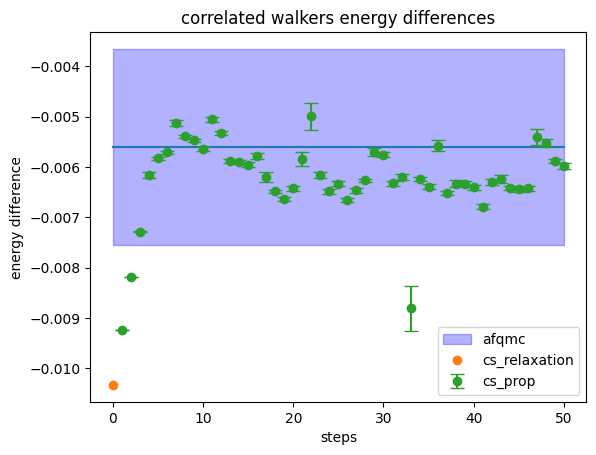

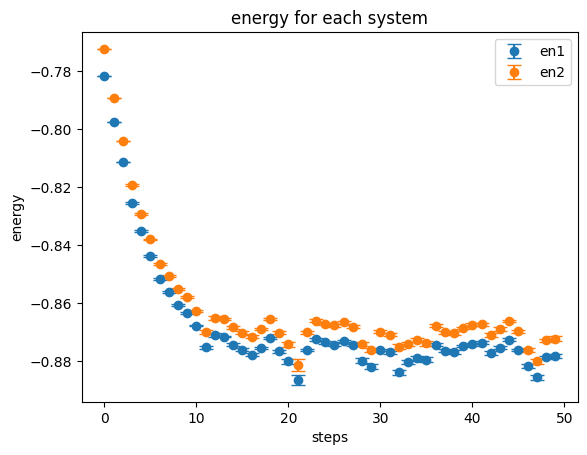

In [18]:
rlx_data = '''
# relaxation from mean-field object using 100 walkers
# rlx_step       system1_en      system2_en      en_diff
    0            -0.762049       -0.751719       -0.010331
# relaxation time: 3.55
'''

prop_data = '''
# correlated sampling
# tot_walkers: 1120, propagation steps: 50, number of independent runs: 1000
# step   system1_en      error           system2_en      error           energy_diff     error
  1      -0.781528       0.000021        -0.772282       0.000023        -0.009246       0.000002
  2      -0.797415       0.000042        -0.789229       0.000046        -0.008187       0.000005
  3      -0.811271       0.000081        -0.803985       0.000088        -0.007286       0.000009
  4      -0.825492       0.000262        -0.819329       0.000318        -0.006163       0.000059
  5      -0.835110       0.000269        -0.829283       0.000295        -0.005827       0.000031
  6      -0.843724       0.000277        -0.838015       0.000294        -0.005709       0.000026
  7      -0.851549       0.000342        -0.846418       0.000393        -0.005131       0.000059
  8      -0.856083       0.000325        -0.850690       0.000345        -0.005393       0.000036
  9      -0.860712       0.000288        -0.855240       0.000309        -0.005473       0.000037
  10     -0.863550       0.000383        -0.857897       0.000385        -0.005653       0.000040
  11     -0.867756       0.000296        -0.862698       0.000315        -0.005058       0.000049
  12     -0.875313       0.000580        -0.869983       0.000588        -0.005330       0.000044
  13     -0.870950       0.000630        -0.865064       0.000612        -0.005886       0.000041
  14     -0.871538       0.000330        -0.865644       0.000352        -0.005895       0.000042
  15     -0.874311       0.000566        -0.868355       0.000605        -0.005956       0.000054
  16     -0.876060       0.000494        -0.870277       0.000515        -0.005783       0.000060
  17     -0.877810       0.000471        -0.871613       0.000503        -0.006196       0.000097
  18     -0.875426       0.000410        -0.868940       0.000417        -0.006487       0.000029
  19     -0.872036       0.000408        -0.865394       0.000407        -0.006642       0.000042
  20     -0.876638       0.000594        -0.870210       0.000582        -0.006428       0.000056
  21     -0.880121       0.000779        -0.874282       0.000862        -0.005839       0.000139
  22     -0.886446       0.001797        -0.881449       0.002052        -0.004996       0.000273
  23     -0.876232       0.000469        -0.870071       0.000496        -0.006161       0.000065
  24     -0.872514       0.000560        -0.866028       0.000569        -0.006486       0.000053
  25     -0.873552       0.000440        -0.867221       0.000475        -0.006330       0.000049
  26     -0.874388       0.000585        -0.867726       0.000595        -0.006662       0.000042
  27     -0.873109       0.000424        -0.866641       0.000434        -0.006468       0.000042
  28     -0.874465       0.000487        -0.868195       0.000497        -0.006269       0.000034
  29     -0.879830       0.000800        -0.874134       0.000831        -0.005697       0.000078
  30     -0.881951       0.000777        -0.876190       0.000799        -0.005761       0.000051
  31     -0.876239       0.000465        -0.869912       0.000477        -0.006328       0.000043
  32     -0.877039       0.000421        -0.870841       0.000438        -0.006198       0.000056
  33     -0.883861       0.000930        -0.875051       0.000941        -0.008810       0.000453
  34     -0.880376       0.000689        -0.874139       0.000703        -0.006237       0.000042
  35     -0.879094       0.000808        -0.872703       0.000823        -0.006392       0.000046
  36     -0.879505       0.000816        -0.873926       0.000903        -0.005579       0.000106
  37     -0.874310       0.000497        -0.867793       0.000509        -0.006517       0.000039
  38     -0.876399       0.000458        -0.870066       0.000488        -0.006334       0.000064
  39     -0.876789       0.000650        -0.870457       0.000686        -0.006332       0.000056
  40     -0.874908       0.000369        -0.868504       0.000408        -0.006404       0.000053
  41     -0.874240       0.000430        -0.867448       0.000434        -0.006792       0.000046
  42     -0.873618       0.000526        -0.867316       0.000572        -0.006302       0.000061
  43     -0.877165       0.000622        -0.870929       0.000647        -0.006236       0.000078
  44     -0.875364       0.000536        -0.868944       0.000551        -0.006420       0.000043
  45     -0.872588       0.000447        -0.866146       0.000484        -0.006442       0.000051
  46     -0.876153       0.000459        -0.869727       0.000479        -0.006425       0.000048
  47     -0.881739       0.000669        -0.876332       0.000703        -0.005407       0.000159
  48     -0.885666       0.000759        -0.880138       0.000807        -0.005528       0.000075
  49     -0.878707       0.000490        -0.872821       0.000510        -0.005886       0.000043
  50     -0.878274       0.000768        -0.872293       0.000816        -0.005981       0.000067
# total run time: 1314.69
'''

rlx_en_diff = []
lines = rlx_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 3:
            rlx_en_diff.append(columns[3])

rlx_en_diff = np.array(rlx_en_diff,dtype='float32')
print(f'{rlx_en_diff}')

prop_en_diff = []
prop_en_diff_err = []
lines = prop_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 5:
            prop_en_diff.append(columns[5])
        if len(columns) > 6:
            prop_en_diff_err.append(columns[6])

prop_en_diff = np.array(prop_en_diff,dtype='float32')
print(f'post relaxation propagation energy difference: {prop_en_diff}')
prop_en_diff_err = np.array(prop_en_diff_err,dtype='float32')
print(f'energy difference error: {prop_en_diff_err}')

rlx_steps = np.arange(len(rlx_en_diff))
prop_steps = np.arange(len(rlx_en_diff),len(rlx_en_diff)+len(prop_en_diff))

afqmc_en_diff = -0.005606581337333716
afqmc_en_diff_err = 0.0019502384765517759
print(f'uncorrelated afqmc energy error: {afqmc_en_diff_err}')
x_steps = np.linspace(0,max(prop_steps),100)
afqmc_en = np.array([afqmc_en_diff]*len(x_steps))
afqmc_lw = afqmc_en-afqmc_en_diff_err
afqmc_up = afqmc_en+afqmc_en_diff_err
plt.plot(x_steps,afqmc_en)
plt.fill_between(x_steps, afqmc_lw, afqmc_up, color='blue', alpha=0.3, label='afqmc')
plt.plot(rlx_steps,rlx_en_diff,'o',label='cs_relaxation')
plt.errorbar(prop_steps,prop_en_diff,yerr=prop_en_diff_err, fmt='o', capsize=5,label='cs_prop')
plt.xlabel('steps')
plt.ylabel('energy difference')
plt.title('correlated walkers energy differences')
plt.legend()
plt.show()

en1 = []
err1 = []
en2 = []
err2 = []

lines = prop_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            en1.append(columns[1])
        if len(columns) > 2:
            err1.append(columns[2])
        if len(columns) > 3:
            en2.append(columns[3])
        if len(columns) > 4:
            err2.append(columns[4])

en1 = np.array(en1,dtype='float32')
err1 = np.array(err1,dtype='float32')
en2 = np.array(en2,dtype='float32')
err2 = np.array(err2,dtype='float32')
prop_steps = np.arange(len(en1))

plt.errorbar(prop_steps,en1,yerr=err1, fmt='o', capsize=5,label='en1')
plt.errorbar(prop_steps,en2,yerr=err2, fmt='o', capsize=5,label='en2')
plt.xlabel('steps')
plt.ylabel('energy')
plt.title('energy for each system')
plt.legend()
plt.show()

[-0.010331]
post relaxation propagation energy difference: [-0.009246 -0.008242 -0.007261 -0.006503 -0.005875 -0.004828 -0.005043
 -0.005043 -0.004563 -0.005224 -0.005468 -0.005409 -0.004953 -0.005935
 -0.006212 -0.006157 -0.005935 -0.006417 -0.00674  -0.006021]
energy difference error: [2.20e-05 4.10e-05 8.30e-05 9.50e-05 1.19e-04 3.91e-04 2.58e-04 2.90e-04
 2.89e-04 6.18e-04 4.17e-04 4.94e-04 4.18e-04 3.62e-04 6.29e-04 5.15e-04
 4.95e-04 3.74e-04 4.13e-04 4.44e-04]
uncorrelated afqmc energy error: 0.0019502384765517759


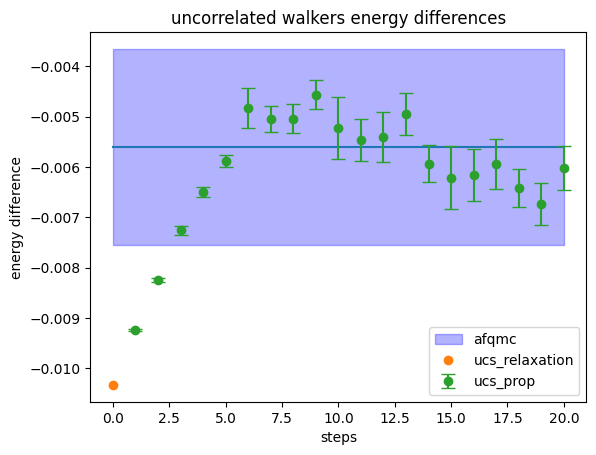

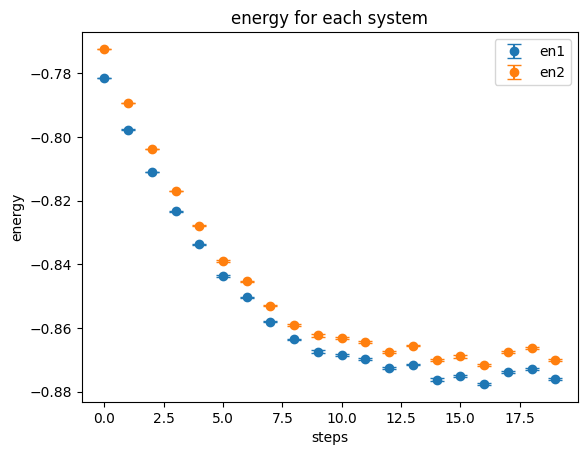

In [16]:
rlx_data = '''
# relaxation from mean-field object using 100 walkers
# rlx_step       system1_en      system2_en      en_diff
    0            -0.762049       -0.751719       -0.010331
# relaxation time: 3.55
'''

prop_data = '''
# uncorrelated sampling
# tot_walkers: 1400, propagation steps: 20, number of independent runs: 2000
# step   system1_en      error           system2_en      error           energy_diff     error
  1      -0.781639       0.000015        -0.772393       0.000016        -0.009246       0.000022
  2      -0.797691       0.000028        -0.789449       0.000030        -0.008242       0.000041
  3      -0.811111       0.000055        -0.803850       0.000060        -0.007261       0.000083
  4      -0.823429       0.000064        -0.816925       0.000070        -0.006503       0.000095
  5      -0.833792       0.000080        -0.827917       0.000092        -0.005875       0.000119
  6      -0.843709       0.000236        -0.838881       0.000314        -0.004828       0.000391
  7      -0.850381       0.000171        -0.845338       0.000187        -0.005043       0.000258
  8      -0.858021       0.000188        -0.852978       0.000221        -0.005043       0.000290
  9      -0.863612       0.000198        -0.859049       0.000212        -0.004563       0.000289
  10     -0.867491       0.000432        -0.862268       0.000428        -0.005224       0.000618
  11     -0.868481       0.000287        -0.863014       0.000300        -0.005468       0.000417
  12     -0.869796       0.000327        -0.864387       0.000369        -0.005409       0.000494
  13     -0.872493       0.000284        -0.867540       0.000312        -0.004953       0.000418
  14     -0.871478       0.000248        -0.865543       0.000264        -0.005935       0.000362
  15     -0.876260       0.000425        -0.870048       0.000449        -0.006212       0.000629
  16     -0.875121       0.000351        -0.868964       0.000370        -0.006157       0.000515
  17     -0.877537       0.000354        -0.871603       0.000355        -0.005935       0.000495
  18     -0.873903       0.000254        -0.867486       0.000265        -0.006417       0.000374
  19     -0.872990       0.000293        -0.866250       0.000296        -0.006740       0.000413
  20     -0.876125       0.000306        -0.870104       0.000318        -0.006021       0.000444
# total run time: 1595.59
'''

rlx_en_diff = []
lines = rlx_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 3:
            rlx_en_diff.append(columns[3])

rlx_en_diff = np.array(rlx_en_diff,dtype='float32')
print(f'{rlx_en_diff}')

prop_en_diff = []
prop_en_diff_err = []
lines = prop_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 5:
            prop_en_diff.append(columns[5])
        if len(columns) > 6:
            prop_en_diff_err.append(columns[6])

prop_en_diff = np.array(prop_en_diff,dtype='float32')
print(f'post relaxation propagation energy difference: {prop_en_diff}')
prop_en_diff_err = np.array(prop_en_diff_err,dtype='float32')
print(f'energy difference error: {prop_en_diff_err}')

rlx_steps = np.arange(len(rlx_en_diff))
prop_steps = np.arange(len(rlx_en_diff),len(rlx_en_diff)+len(prop_en_diff))

afqmc_en_diff = -0.005606581337333716
afqmc_en_diff_err = 0.0019502384765517759
print(f'uncorrelated afqmc energy error: {afqmc_en_diff_err}')
x_steps = np.linspace(0,max(prop_steps),100)
afqmc_en = np.array([afqmc_en_diff]*len(x_steps))
afqmc_lw = afqmc_en-afqmc_en_diff_err
afqmc_up = afqmc_en+afqmc_en_diff_err
plt.plot(x_steps,afqmc_en)
plt.fill_between(x_steps, afqmc_lw, afqmc_up, color='blue', alpha=0.3, label='afqmc')
plt.plot(rlx_steps,rlx_en_diff,'o',label='ucs_relaxation')
plt.errorbar(prop_steps,prop_en_diff,yerr=prop_en_diff_err, fmt='o', capsize=5,label='ucs_prop')
plt.xlabel('steps')
plt.ylabel('energy difference')
plt.title('uncorrelated walkers energy differences')
plt.legend()
plt.show()

en1 = []
err1 = []
en2 = []
err2 = []

lines = prop_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            en1.append(columns[1])
        if len(columns) > 2:
            err1.append(columns[2])
        if len(columns) > 3:
            en2.append(columns[3])
        if len(columns) > 4:
            err2.append(columns[4])

en1 = np.array(en1,dtype='float32')
err1 = np.array(err1,dtype='float32')
en2 = np.array(en2,dtype='float32')
err2 = np.array(err2,dtype='float32')
prop_steps = np.arange(len(en1))

plt.errorbar(prop_steps,en1,yerr=err1, fmt='o', capsize=5,label='en1')
plt.errorbar(prop_steps,en2,yerr=err2, fmt='o', capsize=5,label='en2')
plt.xlabel('steps')
plt.ylabel('energy')
plt.title('energy for each system')
plt.legend()
plt.show()

[-0.010331]
post relaxation propagation energy difference: [-0.00924  -0.008208 -0.007341 -0.006682 -0.005923 -0.006245 -0.005022
 -0.005746 -0.005445 -0.005648]
energy difference error: [2.60e-05 5.20e-05 8.90e-05 1.28e-04 1.95e-04 1.46e-04 8.69e-04 2.33e-04
 2.98e-04 3.05e-04]
uncorrelated afqmc energy error: 0.0019502384765517759


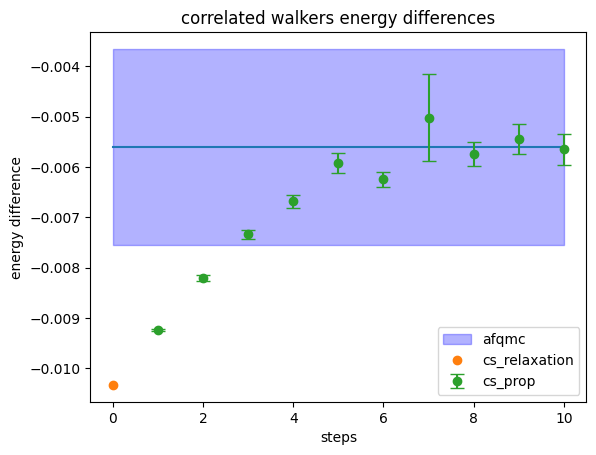

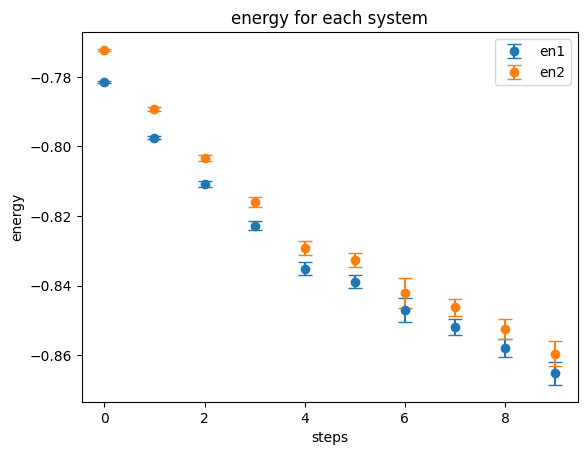

In [7]:
rlx_data = '''
# relaxation from mean-field object using 100 walkers
# rlx_step       system1_en      system2_en      en_diff
    0            -0.762049       -0.751719       -0.010331
# relaxation time: 3.55
'''

prop_data = '''
# step   system1_en      error           system2_en      error           energy_diff     error
  1      -0.781482       0.000238        -0.772242       0.000261        -0.009240       0.000026
  2      -0.797480       0.000498        -0.789272       0.000542        -0.008208       0.000052
  3      -0.810743       0.000802        -0.803402       0.000877        -0.007341       0.000089
  4      -0.822741       0.001284        -0.816058       0.001395        -0.006682       0.000128
  5      -0.835218       0.001874        -0.829295       0.002024        -0.005923       0.000195
  6      -0.838928       0.001847        -0.832683       0.001949        -0.006245       0.000146
  7      -0.847119       0.003453        -0.842097       0.004258        -0.005022       0.000869
  8      -0.852021       0.002282        -0.846276       0.002406        -0.005746       0.000233
  9      -0.857919       0.002691        -0.852474       0.002942        -0.005445       0.000298
  10     -0.865201       0.003344        -0.859552       0.003573        -0.005648       0.000305
# total run time: 24.86
'''

rlx_en_diff = []
lines = rlx_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 3:
            rlx_en_diff.append(columns[3])

rlx_en_diff = np.array(rlx_en_diff,dtype='float32')
print(f'{rlx_en_diff}')

prop_en_diff = []
prop_en_diff_err = []
lines = prop_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 5:
            prop_en_diff.append(columns[5])
        if len(columns) > 6:
            prop_en_diff_err.append(columns[6])

prop_en_diff = np.array(prop_en_diff,dtype='float32')
print(f'post relaxation propagation energy difference: {prop_en_diff}')
prop_en_diff_err = np.array(prop_en_diff_err,dtype='float32')
print(f'energy difference error: {prop_en_diff_err}')

rlx_steps = np.arange(len(rlx_en_diff))
prop_steps = np.arange(len(rlx_en_diff),len(rlx_en_diff)+len(prop_en_diff))

afqmc_en_diff = -0.005606581337333716
afqmc_en_diff_err = 0.0019502384765517759
print(f'uncorrelated afqmc energy error: {afqmc_en_diff_err}')
x_steps = np.linspace(0,max(prop_steps),100)
afqmc_en = np.array([afqmc_en_diff]*len(x_steps))
afqmc_lw = afqmc_en-afqmc_en_diff_err
afqmc_up = afqmc_en+afqmc_en_diff_err
plt.plot(x_steps,afqmc_en)
plt.fill_between(x_steps, afqmc_lw, afqmc_up, color='blue', alpha=0.3, label='afqmc')
plt.plot(rlx_steps,rlx_en_diff,'o',label='cs_relaxation')
plt.errorbar(prop_steps,prop_en_diff,yerr=prop_en_diff_err, fmt='o', capsize=5,label='cs_prop')
plt.xlabel('steps')
plt.ylabel('energy difference')
plt.title('correlated walkers energy differences')
plt.legend()
plt.show()

en1 = []
err1 = []
en2 = []
err2 = []

lines = prop_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            en1.append(columns[1])
        if len(columns) > 2:
            err1.append(columns[2])
        if len(columns) > 3:
            en2.append(columns[3])
        if len(columns) > 4:
            err2.append(columns[4])

en1 = np.array(en1,dtype='float32')
err1 = np.array(err1,dtype='float32')
en2 = np.array(en2,dtype='float32')
err2 = np.array(err2,dtype='float32')
prop_steps = np.arange(len(en1))

plt.errorbar(prop_steps,en1,yerr=err1, fmt='o', capsize=5,label='en1')
plt.errorbar(prop_steps,en2,yerr=err2, fmt='o', capsize=5,label='en2')
plt.xlabel('steps')
plt.ylabel('energy')
plt.title('energy for each system')
plt.legend()
plt.show()

[-0.010331]
post relaxation propagation energy difference: [-0.00924  -0.008208 -0.007341 -0.006682 -0.005923 -0.006245 -0.005022]
energy difference error: [2.60e-05 5.20e-05 8.90e-05 1.28e-04 1.95e-04 1.46e-04 8.69e-04]
uncorrelated afqmc energy error: 0.0019502384765517759


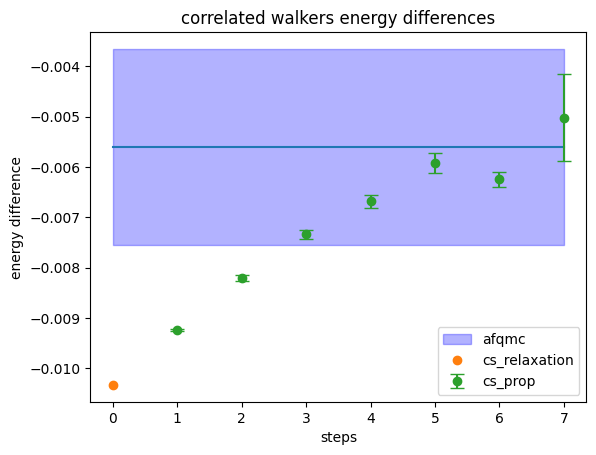

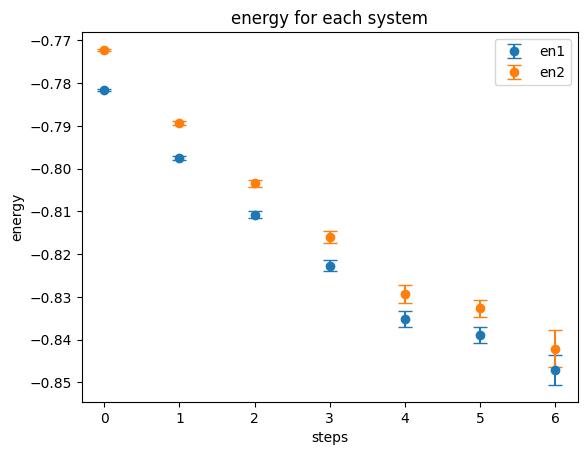

In [8]:
rlx_data = '''
# relaxation from mean-field object using 100 walkers
# rlx_step       system1_en      system2_en      en_diff
    0            -0.762049       -0.751719       -0.010331
# relaxation time: 3.55
'''

prop_data = '''
# multiple independent post relaxation propagation with step size 0.005s
# correlated sampling
# tot_walkers: 100, propagation steps: 7, number of independent runs: 100
# step   system1_en      error           system2_en      error           energy_diff     error
  1      -0.781482       0.000238        -0.772242       0.000261        -0.009240       0.000026
  2      -0.797480       0.000498        -0.789272       0.000542        -0.008208       0.000052
  3      -0.810743       0.000802        -0.803402       0.000877        -0.007341       0.000089
  4      -0.822741       0.001284        -0.816058       0.001395        -0.006682       0.000128
  5      -0.835218       0.001874        -0.829295       0.002024        -0.005923       0.000195
  6      -0.838928       0.001847        -0.832683       0.001949        -0.006245       0.000146
  7      -0.847119       0.003453        -0.842097       0.004258        -0.005022       0.000869
# total run time: 48.40
'''

rlx_en_diff = []
lines = rlx_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 3:
            rlx_en_diff.append(columns[3])

rlx_en_diff = np.array(rlx_en_diff,dtype='float32')
print(f'{rlx_en_diff}')

prop_en_diff = []
prop_en_diff_err = []
lines = prop_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 5:
            prop_en_diff.append(columns[5])
        if len(columns) > 6:
            prop_en_diff_err.append(columns[6])

prop_en_diff = np.array(prop_en_diff,dtype='float32')
print(f'post relaxation propagation energy difference: {prop_en_diff}')
prop_en_diff_err = np.array(prop_en_diff_err,dtype='float32')
print(f'energy difference error: {prop_en_diff_err}')

rlx_steps = np.arange(len(rlx_en_diff))
prop_steps = np.arange(len(rlx_en_diff),len(rlx_en_diff)+len(prop_en_diff))

afqmc_en_diff = -0.005606581337333716
afqmc_en_diff_err = 0.0019502384765517759
print(f'uncorrelated afqmc energy error: {afqmc_en_diff_err}')
x_steps = np.linspace(0,max(prop_steps),100)
afqmc_en = np.array([afqmc_en_diff]*len(x_steps))
afqmc_lw = afqmc_en-afqmc_en_diff_err
afqmc_up = afqmc_en+afqmc_en_diff_err
plt.plot(x_steps,afqmc_en)
plt.fill_between(x_steps, afqmc_lw, afqmc_up, color='blue', alpha=0.3, label='afqmc')
plt.plot(rlx_steps,rlx_en_diff,'o',label='cs_relaxation')
plt.errorbar(prop_steps,prop_en_diff,yerr=prop_en_diff_err, fmt='o', capsize=5,label='cs_prop')
plt.xlabel('steps')
plt.ylabel('energy difference')
plt.title('correlated walkers energy differences')
plt.legend()
plt.show()

en1 = []
err1 = []
en2 = []
err2 = []

lines = prop_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            en1.append(columns[1])
        if len(columns) > 2:
            err1.append(columns[2])
        if len(columns) > 3:
            en2.append(columns[3])
        if len(columns) > 4:
            err2.append(columns[4])

en1 = np.array(en1,dtype='float32')
err1 = np.array(err1,dtype='float32')
en2 = np.array(en2,dtype='float32')
err2 = np.array(err2,dtype='float32')
prop_steps = np.arange(len(en1))

plt.errorbar(prop_steps,en1,yerr=err1, fmt='o', capsize=5,label='en1')
plt.errorbar(prop_steps,en2,yerr=err2, fmt='o', capsize=5,label='en2')
plt.xlabel('steps')
plt.ylabel('energy')
plt.title('energy for each system')
plt.legend()
plt.show()

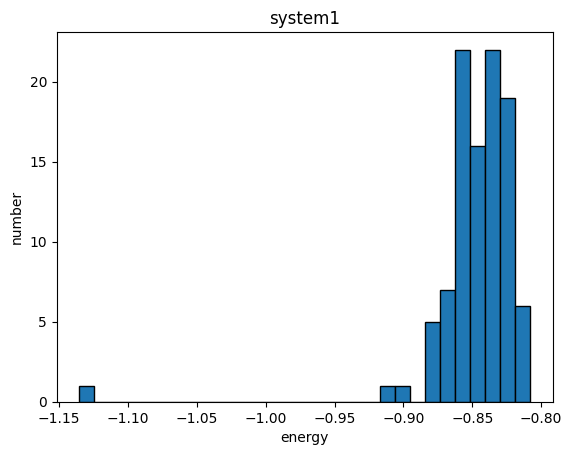

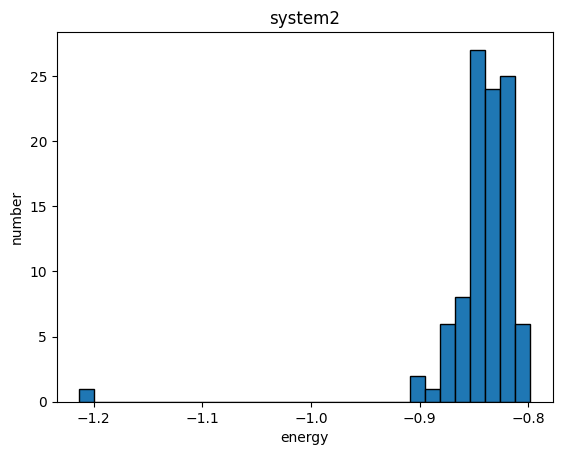

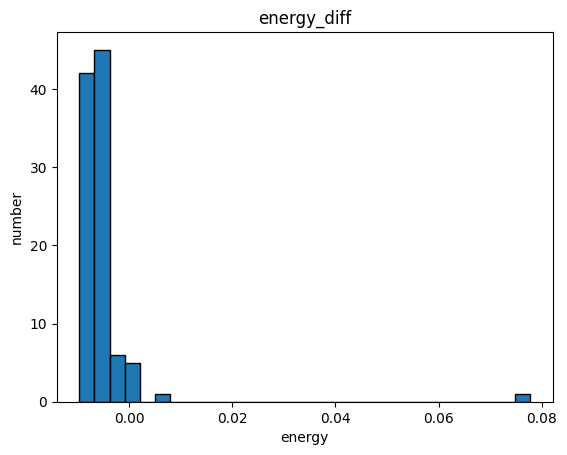

In [19]:
last_step = '''
# debug the big uncertainty step
# run    sys1_en         sys2_en         en_diff
  1      -0.828183       -0.820711       -0.007472
  2      -0.826960       -0.820886       -0.006074
  3      -0.828379       -0.820082       -0.008297
  4      -0.832864       -0.825480       -0.007384
  5      -0.855673       -0.848983       -0.006690
  6      -0.850702       -0.846643       -0.004059
  7      -0.826929       -0.819956       -0.006974
  8      -0.864414       -0.856465       -0.007949
  9      -0.851148       -0.846184       -0.004964
  10     -0.861604       -0.856583       -0.005022
  11     -0.840449       -0.834441       -0.006009
  12     -0.846762       -0.842099       -0.004664
  13     -0.835895       -0.828937       -0.006958
  14     -0.865382       -0.861129       -0.004253
  15     -0.853617       -0.847565       -0.006051
  16     -0.858692       -0.852353       -0.006339
  17     -0.821340       -0.815327       -0.006013
  18     -0.869027       -0.876376       0.007349
  19     -0.837250       -0.833309       -0.003941
  20     -0.880214       -0.881903       0.001689
  21     -0.866412       -0.861011       -0.005401
  22     -0.857359       -0.851818       -0.005540
  23     -0.857523       -0.850014       -0.007509
  24     -0.836631       -0.830282       -0.006350
  25     -0.844961       -0.839428       -0.005533
  26     -0.835559       -0.827558       -0.008001
  27     -0.857581       -0.852189       -0.005392
  28     -0.840965       -0.834227       -0.006738
  29     -0.825730       -0.819576       -0.006154
  30     -0.850791       -0.847087       -0.003704
  31     -0.854682       -0.846429       -0.008253
  32     -0.816681       -0.808739       -0.007942
  33     -0.822696       -0.814688       -0.008008
  34     -0.828231       -0.822018       -0.006213
  35     -0.855774       -0.850149       -0.005625
  36     -0.835712       -0.828546       -0.007166
  37     -0.879972       -0.879915       -0.000056
  38     -0.822488       -0.814848       -0.007640
  39     -0.833533       -0.825953       -0.007580
  40     -0.855175       -0.848393       -0.006782
  41     -0.811588       -0.803977       -0.007611
  42     -0.822851       -0.814551       -0.008300
  43     -0.821019       -0.813149       -0.007870
  44     -0.856891       -0.852353       -0.004538
  45     -0.907071       -0.907625       0.000554
  46     -0.816387       -0.807928       -0.008459
  47     -0.831114       -0.824073       -0.007041
  48     -0.858838       -0.852084       -0.006754
  49     -0.832119       -0.824691       -0.007427
  50     -0.836464       -0.830017       -0.006447
  51     -0.825171       -0.816894       -0.008277
  52     -1.135239       -1.213034       0.077795
  53     -0.841509       -0.835524       -0.005985
  54     -0.846096       -0.839720       -0.006377
  55     -0.850932       -0.845490       -0.005442
  56     -0.833649       -0.827176       -0.006473
  57     -0.824679       -0.818608       -0.006072
  58     -0.824382       -0.817017       -0.007365
  59     -0.837577       -0.830935       -0.006642
  60     -0.879005       -0.877812       -0.001193
  61     -0.817936       -0.809530       -0.008406
  62     -0.855568       -0.849889       -0.005679
  63     -0.831424       -0.824260       -0.007164
  64     -0.826513       -0.819297       -0.007216
  65     -0.848228       -0.849720       0.001492
  66     -0.856938       -0.852719       -0.004220
  67     -0.874521       -0.867957       -0.006565
  68     -0.844201       -0.838314       -0.005887
  69     -0.813954       -0.806793       -0.007161
  70     -0.861616       -0.859614       -0.002002
  71     -0.835843       -0.829254       -0.006590
  72     -0.836703       -0.829392       -0.007311
  73     -0.882539       -0.878344       -0.004195
  74     -0.900715       -0.899881       -0.000834
  75     -0.833728       -0.826874       -0.006854
  76     -0.827455       -0.820569       -0.006886
  77     -0.854585       -0.849643       -0.004942
  78     -0.864424       -0.861976       -0.002448
  79     -0.833715       -0.826836       -0.006879
  80     -0.831220       -0.824932       -0.006288
  81     -0.825174       -0.817507       -0.007667
  82     -0.850832       -0.844121       -0.006711
  83     -0.826309       -0.818949       -0.007360
  84     -0.842017       -0.836042       -0.005975
  85     -0.851847       -0.844839       -0.007007
  86     -0.842326       -0.836839       -0.005486
  87     -0.854699       -0.849228       -0.005472
  88     -0.853131       -0.847595       -0.005536
  89     -0.865300       -0.858729       -0.006571
  90     -0.857953       -0.852433       -0.005520
  91     -0.840930       -0.834262       -0.006668
  92     -0.836408       -0.830002       -0.006406
  93     -0.852568       -0.844217       -0.008351
  94     -0.873235       -0.870064       -0.003171
  95     -0.841802       -0.834885       -0.006917
  96     -0.839685       -0.832674       -0.007011
  97     -0.807804       -0.798170       -0.009634
  98     -0.859548       -0.856613       -0.002935
  99     -0.829940       -0.820713       -0.009227
  100    -0.822003       -0.815056       -0.006947
# system1 energy: -0.847119
# system2 energy: -0.842097
# energy difference: -0.005022
'''

samp_en1 = []
samp_en2 = []
samp_diff = []

lines = last_step.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            samp_en1.append(columns[1])
        if len(columns) > 2:
            samp_en2.append(columns[2])
        if len(columns) > 3:
            samp_diff.append(columns[3])

samp_en1 = np.array(samp_en1,dtype='float32')
samp_en2 = np.array(samp_en2,dtype='float32')
samp_diff = np.array(samp_diff,dtype='float32')

plt.hist(samp_en1 , bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number')
plt.title('system1')
plt.show()
plt.hist(samp_en2, bins=30,edgecolor='black')
plt.xlabel('energy')
plt.ylabel('number')
plt.title('system2')
plt.show()
plt.hist(samp_diff, bins=30,edgecolor='black')
plt.xlabel('energy')
plt.ylabel('number')
plt.title('energy_diff')
plt.show()

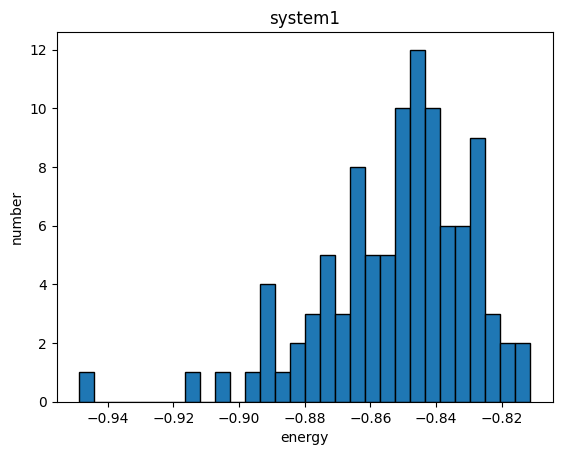

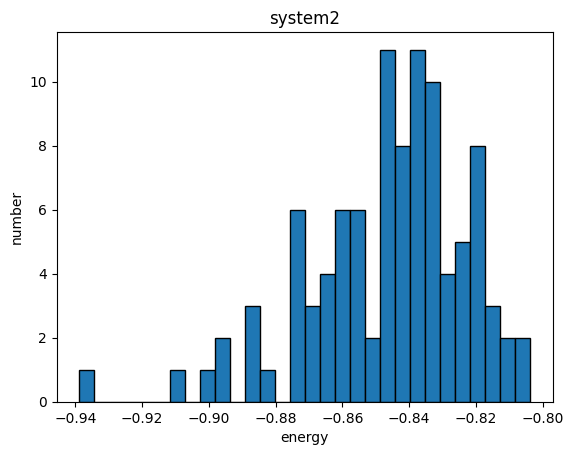

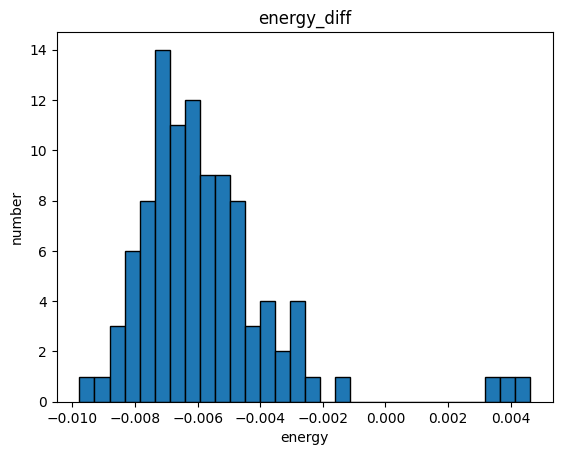

In [20]:
last_step = '''
# debug the big uncertainty step
# run    sys1_en         sys2_en         en_diff
  1      -0.845587       -0.841343       -0.004244
  2      -0.835977       -0.830579       -0.005398
  3      -0.848231       -0.843610       -0.004620
  4      -0.871007       -0.864926       -0.006081
  5      -0.904931       -0.900944       -0.003988
  6      -0.853482       -0.848099       -0.005383
  7      -0.817423       -0.809742       -0.007681
  8      -0.848677       -0.841909       -0.006768
  9      -0.847940       -0.843232       -0.004708
  10     -0.833052       -0.824962       -0.008090
  11     -0.853027       -0.848351       -0.004676
  12     -0.851065       -0.845689       -0.005376
  13     -0.828850       -0.822211       -0.006639
  14     -0.880113       -0.875408       -0.004705
  15     -0.864449       -0.858833       -0.005615
  16     -0.839249       -0.833376       -0.005873
  17     -0.823920       -0.816644       -0.007276
  18     -0.851784       -0.845173       -0.006611
  19     -0.845919       -0.839148       -0.006771
  20     -0.863725       -0.862534       -0.001191
  21     -0.866524       -0.861032       -0.005492
  22     -0.842253       -0.834485       -0.007768
  23     -0.865562       -0.858264       -0.007298
  24     -0.811328       -0.804194       -0.007133
  25     -0.836098       -0.829083       -0.007015
  26     -0.847475       -0.840442       -0.007032
  27     -0.890376       -0.888079       -0.002297
  28     -0.841840       -0.835331       -0.006508
  29     -0.842345       -0.836765       -0.005580
  30     -0.840444       -0.833279       -0.007164
  31     -0.840395       -0.832605       -0.007790
  32     -0.825092       -0.817555       -0.007537
  33     -0.846787       -0.838612       -0.008175
  34     -0.821901       -0.814866       -0.007036
  35     -0.855149       -0.848886       -0.006263
  36     -0.831437       -0.823063       -0.008374
  37     -0.873024       -0.870099       -0.002925
  38     -0.827638       -0.821138       -0.006500
  39     -0.842824       -0.835713       -0.007111
  40     -0.853840       -0.848363       -0.005477
  41     -0.948578       -0.938801       -0.009777
  42     -0.831062       -0.823988       -0.007074
  43     -0.837784       -0.831059       -0.006725
  44     -0.852909       -0.847133       -0.005776
  45     -0.860598       -0.855645       -0.004953
  46     -0.825333       -0.817453       -0.007880
  47     -0.847771       -0.841649       -0.006122
  48     -0.885798       -0.882552       -0.003245
  49     -0.825145       -0.817251       -0.007895
  50     -0.837224       -0.830846       -0.006379
  51     -0.881685       -0.875549       -0.006136
  52     -0.877062       -0.872486       -0.004575
  53     -0.867852       -0.863294       -0.004558
  54     -0.846113       -0.838775       -0.007338
  55     -0.859274       -0.856675       -0.002599
  56     -0.826767       -0.819578       -0.007188
  57     -0.841600       -0.837615       -0.003985
  58     -0.851638       -0.848419       -0.003219
  59     -0.865202       -0.860027       -0.005175
  60     -0.874857       -0.868701       -0.006156
  61     -0.812685       -0.803694       -0.008991
  62     -0.865544       -0.859177       -0.006367
  63     -0.869018       -0.872770       0.003752
  64     -0.830251       -0.821468       -0.008783
  65     -0.893066       -0.897698       0.004632
  66     -0.842601       -0.836079       -0.006522
  67     -0.871098       -0.864764       -0.006334
  68     -0.877221       -0.874201       -0.003020
  69     -0.840905       -0.833908       -0.006997
  70     -0.863311       -0.859360       -0.003951
  71     -0.838062       -0.832689       -0.005373
  72     -0.844178       -0.836559       -0.007618
  73     -0.876398       -0.873424       -0.002973
  74     -0.891343       -0.887767       -0.003577
  75     -0.822116       -0.814406       -0.007710
  76     -0.838299       -0.831527       -0.006771
  77     -0.843915       -0.837649       -0.006266
  78     -0.893965       -0.897548       0.003583
  79     -0.826390       -0.818823       -0.007568
  80     -0.851227       -0.846975       -0.004252
  81     -0.852369       -0.845898       -0.006471
  82     -0.861675       -0.855915       -0.005760
  83     -0.825107       -0.817547       -0.007560
  84     -0.858702       -0.853480       -0.005222
  85     -0.843473       -0.834978       -0.008495
  86     -0.828335       -0.822342       -0.005994
  87     -0.912513       -0.907686       -0.004827
  88     -0.851767       -0.846004       -0.005762
  89     -0.846646       -0.838315       -0.008331
  90     -0.872768       -0.866778       -0.005990
  91     -0.862790       -0.855765       -0.007025
  92     -0.858232       -0.852905       -0.005327
  93     -0.818991       -0.811088       -0.007903
  94     -0.847420       -0.840627       -0.006793
  95     -0.834155       -0.827257       -0.006897
  96     -0.891280       -0.886974       -0.004306
  97     -0.833022       -0.827373       -0.005649
  98     -0.859605       -0.854610       -0.004995
  99     -0.850747       -0.844664       -0.006083
  100    -0.845954       -0.840813       -0.005141
# system1 energy: -0.852021
# system2 energy: -0.846276
# energy difference: -0.005746
'''

samp_en1 = []
samp_en2 = []
samp_diff = []

lines = last_step.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            samp_en1.append(columns[1])
        if len(columns) > 2:
            samp_en2.append(columns[2])
        if len(columns) > 3:
            samp_diff.append(columns[3])

samp_en1 = np.array(samp_en1,dtype='float32')
samp_en2 = np.array(samp_en2,dtype='float32')
samp_diff = np.array(samp_diff,dtype='float32')

plt.hist(samp_en1 , bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number')
plt.title('system1')
plt.show()
plt.hist(samp_en2, bins=30,edgecolor='black')
plt.xlabel('energy')
plt.ylabel('number')
plt.title('system2')
plt.show()
plt.hist(samp_diff, bins=30,edgecolor='black')
plt.xlabel('energy')
plt.ylabel('number')
plt.title('energy_diff')
plt.show()

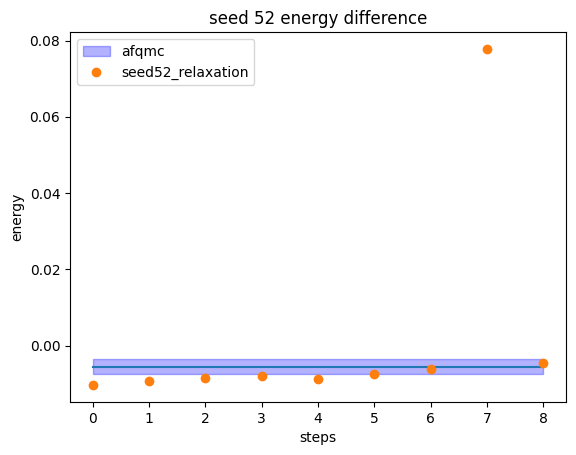

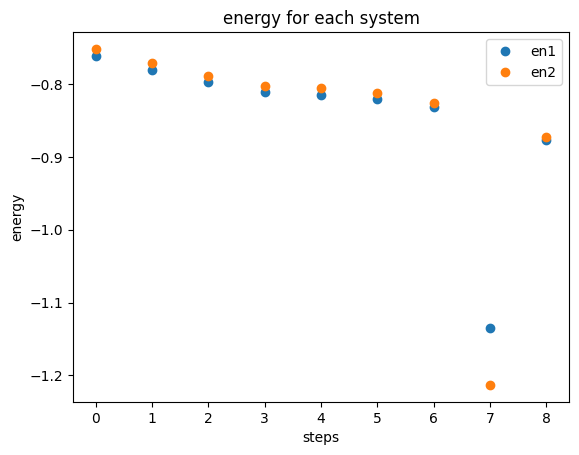

In [11]:
### investigate run 52 ###
### seeds[51] = 514825 

rlx_data = '''
# relaxation from mean-field object using 100 walkers
# rlx_step       system1_en      system2_en      en_diff
    0            -0.762049       -0.751719       -0.010331
    1            -0.780147       -0.770754       -0.009392
    2            -0.797634       -0.789149       -0.008484
    3            -0.811106       -0.803070       -0.008036
    4            -0.814336       -0.805636       -0.008700
    5            -0.820182       -0.812610       -0.007571
    6            -0.831913       -0.825825       -0.006088
    7            -1.135239       -1.213034       0.077795
    8            -0.877062       -0.872486       -0.004575
# relaxation time: 26.37
'''

step = []
en_diff = []
en1 = []
en2 = []
lines = rlx_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 0:
            step.append(columns[0])
        if len(columns) > 1:
            en1.append(columns[1])
        if len(columns) > 2:
            en2.append(columns[2])
        if len(columns) > 3:
            en_diff.append(columns[3])

step = np.array(step,dtype='float32')
en1 = np.array(en1,dtype='float32')
en2 = np.array(en2,dtype='float32')
en_diff = np.array(en_diff,dtype='float32')


afqmc_en_diff = -0.005606581337333716
afqmc_en_diff_err = 0.0019502384765517759
x_steps = np.linspace(0,max(step),100)
afqmc_en = np.array([afqmc_en_diff]*len(x_steps))
afqmc_lw = afqmc_en-afqmc_en_diff_err
afqmc_up = afqmc_en+afqmc_en_diff_err
plt.plot(x_steps,afqmc_en)
plt.fill_between(x_steps, afqmc_lw, afqmc_up, color='blue', alpha=0.3, label='afqmc')
plt.plot(step,en_diff,'o',label='seed52_relaxation')
#plt.errorbar(prop_steps,prop_en_diff,yerr=prop_en_diff_err, fmt='o', capsize=5,label='ucs_prop')
plt.xlabel('steps')
plt.ylabel('energy')
plt.title('seed 52 energy difference')
plt.legend()
plt.show()


plt.plot(step,en1,'o',label='en1')
plt.plot(step,en2,'o',label='en2')
plt.xlabel('steps')
plt.ylabel('energy')
plt.title('energy for each system')
plt.legend()
plt.show()

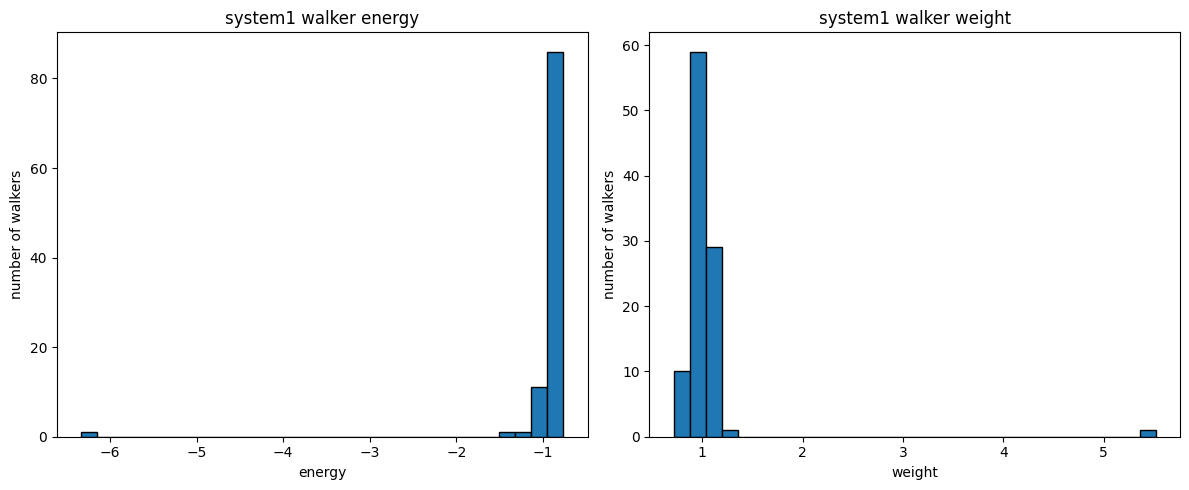

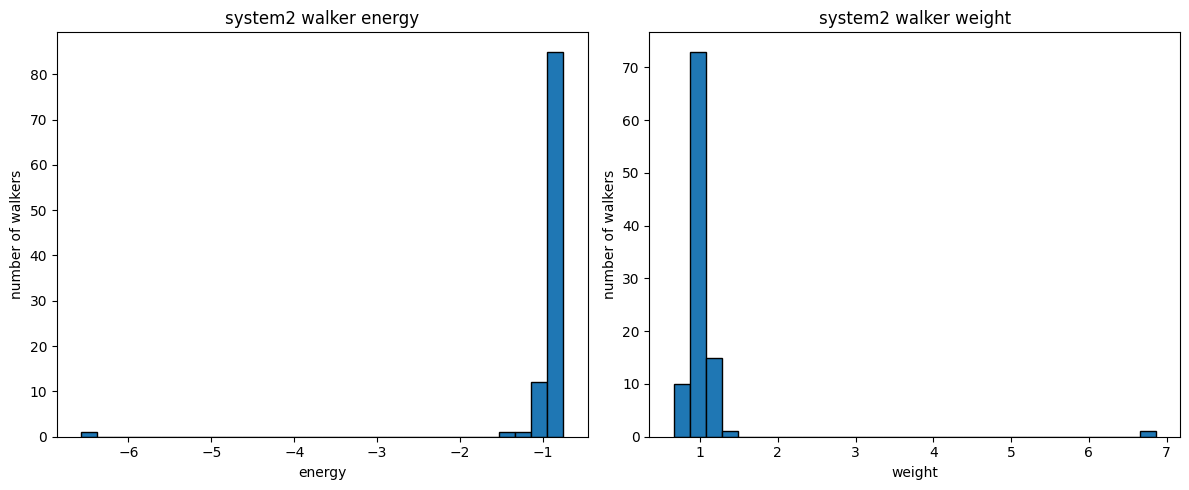

In [2]:
### investigate walkers at step 7 ###

walker_data = '''
# walkers analyze of the last step
# the energy system1 is -1.135239
# the energy system2 is -1.213034
# walker   system1_en      system1_wt      system2_en      system2_wt
1        -0.926571       1.144310        -0.923138       1.149057
2        -0.770891       0.991109        -0.761602       0.984945
3        -0.777341       1.041629        -0.769201       1.047335
4        -0.915252       0.889610        -0.939848       0.890843
5        -0.786599       0.959346        -0.777033       0.956737
6        -0.906101       0.982010        -0.905395       0.979680
7        -0.770419       0.875246        -0.756316       0.878219
8        -0.945518       1.083760        -0.952215       1.092903
9        -0.827925       0.977970        -0.823937       0.974545
10       -0.776265       1.065106        -0.765020       1.058610
11       -1.026451       1.113318        -1.033821       1.122085
12       -1.054531       0.951357        -1.041961       0.948001
13       -0.878350       0.905339        -0.861596       0.897007
14       -0.781460       0.963538        -0.770757       0.960758
15       -0.798389       1.020428        -0.784949       1.015550
16       -0.822605       0.970820        -0.816132       0.969764
17       -0.772330       1.117347        -0.761936       1.126319
18       -0.812588       0.967886        -0.804593       0.966954
19       -0.818083       1.072219        -0.811167       1.079244
20       -0.764727       0.979060        -0.754239       0.977805
21       -0.782452       1.056854        -0.773018       1.061924
22       -0.770670       1.024563        -0.760015       1.025981
23       -0.784588       1.047843        -0.774258       1.050057
24       -0.807213       0.977322        -0.799974       0.974920
25       -0.792773       0.916442        -0.783385       0.915865
26       -0.769094       0.940665        -0.758694       0.935831
27       -0.767308       1.007684        -0.756707       1.007510
28       -0.893372       1.117848        -0.886260       1.114425
29       -0.894249       0.981140        -0.892302       0.981598
30       -0.977481       0.981146        -0.996457       0.987441
31       -0.763348       1.092974        -0.752931       1.090537
32       -0.766293       0.967988        -0.756054       0.965442
33       -0.785251       1.051254        -0.773987       1.054778
34       -0.818437       0.987952        -0.811203       0.990030
35       -0.775108       0.968641        -0.764619       0.964291
36       -0.793675       0.927102        -0.781146       0.921181
37       -0.780381       1.144869        -0.770474       1.156751
38       -0.802839       0.997433        -0.799677       0.998287
39       -0.775263       0.904122        -0.764573       0.897087
40       -0.859503       0.967941        -0.863234       0.973359
41       -0.769712       0.995607        -0.759782       0.990139
42       -0.783548       0.953329        -0.774414       0.948667
43       -0.802885       1.082414        -0.795671       1.084892
44       -0.792006       1.038631        -0.782905       1.037826
45       -0.803552       1.031686        -0.799301       1.036815
46       -0.847345       0.900019        -0.841429       0.895279
47       -0.889967       1.096258        -0.882559       1.107675
48       -0.766424       0.976078        -0.756046       0.975075
49       -0.793540       0.927769        -0.788036       0.926865
50       -0.787983       1.025841        -0.775771       1.025870
51       -0.781421       0.968112        -0.769954       0.966630
52       -0.785084       1.040030        -0.777923       1.043158
53       -0.767060       0.971171        -0.756743       0.969953
54       -0.765744       1.002918        -0.755738       1.003516
55       -0.763892       0.819040        -0.756288       0.812490
56       -0.772784       1.098309        -0.762614       1.102346
57       -0.828658       1.035408        -0.815554       1.031225
58       -0.767876       0.974776        -0.757861       0.972880
59       -1.423779       0.966610        -1.462106       0.968226
60       -0.860992       1.119219        -0.860521       1.124510
61       -0.788736       0.931011        -0.779684       0.929562
62       -0.828169       0.914360        -0.822405       0.910616
63       -0.785857       0.933645        -0.774903       0.930852
64       -0.875493       1.051514        -0.868883       1.054883
65       -0.812218       0.998127        -0.807150       0.998851
66       -0.770449       0.984664        -0.760183       0.989479
67       -0.884439       1.016982        -0.886830       1.018904
68       -0.767289       0.996091        -0.757050       0.991619
69       -0.964583       1.177150        -0.969433       1.183945
70       -0.792345       1.009157        -0.778104       1.004191
71       -0.784085       0.885789        -0.773733       0.882090
72       -0.996688       0.923663        -0.989024       0.922429
73       -1.000612       1.072994        -0.984948       1.069284
74       -0.778546       1.060682        -0.767233       1.065297
75       -0.782855       1.012229        -0.774355       1.009015
76       -0.874427       0.889290        -0.874439       0.883597
77       -0.796758       1.011122        -0.789513       1.013880
78       -0.867777       1.059632        -0.853423       1.059308
79       -1.088371       1.095921        -1.095706       1.101131
80       -0.816444       1.044319        -0.810371       1.052332
81       -1.173784       1.266235        -1.162101       1.281494
82       -0.799453       0.920771        -0.788089       0.913343
83       -0.801806       1.162227        -0.791896       1.174137
84       -0.873588       1.035260        -0.861701       1.037824
85       -0.783710       0.912495        -0.776192       0.908799
86       -0.775645       0.938184        -0.765263       0.935547
87       -0.768432       0.937400        -0.758504       0.933538
88       -0.789189       0.919991        -0.779906       0.916133
89       -1.036782       0.961148        -1.029067       0.956447
90       -0.783473       0.977705        -0.776761       0.975465
91       -6.334997       5.521499        -6.572141       6.860883
92       -1.020677       0.853840        -1.006898       0.787625
93       -0.782601       0.719440        -0.770171       0.662739
94       -0.768488       0.753559        -0.758061       0.692669
95       -0.767002       0.714427        -0.757281       0.660250
96       -0.837177       0.816808        -0.828497       0.757552
97       -1.024579       0.802297        -1.029692       0.743050
98       -0.802663       0.820184        -0.792437       0.759847
99       -0.983823       0.826297        -0.973162       0.759921
100      -0.785846       0.855575        -0.778165       0.793962
'''

walker_en1 = []
walker_wt1 = []
walker_en2 = []
walker_wt2 = []
lines = walker_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            walker_en1.append(columns[1])
        if len(columns) > 2:
            walker_wt1.append(columns[2])
        if len(columns) > 3:
            walker_en2.append(columns[3])
        if len(columns) > 4:
            walker_wt2.append(columns[4])

walker_en1 = np.array(walker_en1,dtype='float32')
walker_wt1 = np.array(walker_wt1,dtype='float32')
walker_en2 = np.array(walker_en2,dtype='float32')
walker_wt2 = np.array(walker_wt2,dtype='float32')



# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot data in the first subplot
ax1.hist(walker_en1 , bins=30, edgecolor='black')  
ax1.set_title("system1 walker energy")
ax1.set_xlabel("energy")
ax1.set_ylabel("number of walkers")


# Plot data in the second subplot
ax2.hist(walker_wt1 , bins=30, edgecolor='black')  
ax2.set_title("system1 walker weight")
ax2.set_xlabel("weight")
ax2.set_ylabel("number of walkers")


# Adjust layout and display the plot
plt.tight_layout()
plt.show()



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot data in the first subplot
ax1.hist(walker_en2 , bins=30, edgecolor='black')  
ax1.set_title("system2 walker energy")
ax1.set_xlabel("energy")
ax1.set_ylabel("number of walkers")


# Plot data in the second subplot
ax2.hist(walker_wt2 , bins=30, edgecolor='black')  
ax2.set_title("system2 walker weight")
ax2.set_xlabel("weight")
ax2.set_ylabel("number of walkers")


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [5]:
### remove walker 91
### investigate walkers at step 7 ###

walker_data = '''
# walkers analyze of the last step
# the energy system1 is -1.135239
# the energy system2 is -1.213034
# walker   system1_en      system1_wt      system2_en      system2_wt
1        -0.926571       1.144310        -0.923138       1.149057
2        -0.770891       0.991109        -0.761602       0.984945
3        -0.777341       1.041629        -0.769201       1.047335
4        -0.915252       0.889610        -0.939848       0.890843
5        -0.786599       0.959346        -0.777033       0.956737
6        -0.906101       0.982010        -0.905395       0.979680
7        -0.770419       0.875246        -0.756316       0.878219
8        -0.945518       1.083760        -0.952215       1.092903
9        -0.827925       0.977970        -0.823937       0.974545
10       -0.776265       1.065106        -0.765020       1.058610
11       -1.026451       1.113318        -1.033821       1.122085
12       -1.054531       0.951357        -1.041961       0.948001
13       -0.878350       0.905339        -0.861596       0.897007
14       -0.781460       0.963538        -0.770757       0.960758
15       -0.798389       1.020428        -0.784949       1.015550
16       -0.822605       0.970820        -0.816132       0.969764
17       -0.772330       1.117347        -0.761936       1.126319
18       -0.812588       0.967886        -0.804593       0.966954
19       -0.818083       1.072219        -0.811167       1.079244
20       -0.764727       0.979060        -0.754239       0.977805
21       -0.782452       1.056854        -0.773018       1.061924
22       -0.770670       1.024563        -0.760015       1.025981
23       -0.784588       1.047843        -0.774258       1.050057
24       -0.807213       0.977322        -0.799974       0.974920
25       -0.792773       0.916442        -0.783385       0.915865
26       -0.769094       0.940665        -0.758694       0.935831
27       -0.767308       1.007684        -0.756707       1.007510
28       -0.893372       1.117848        -0.886260       1.114425
29       -0.894249       0.981140        -0.892302       0.981598
30       -0.977481       0.981146        -0.996457       0.987441
31       -0.763348       1.092974        -0.752931       1.090537
32       -0.766293       0.967988        -0.756054       0.965442
33       -0.785251       1.051254        -0.773987       1.054778
34       -0.818437       0.987952        -0.811203       0.990030
35       -0.775108       0.968641        -0.764619       0.964291
36       -0.793675       0.927102        -0.781146       0.921181
37       -0.780381       1.144869        -0.770474       1.156751
38       -0.802839       0.997433        -0.799677       0.998287
39       -0.775263       0.904122        -0.764573       0.897087
40       -0.859503       0.967941        -0.863234       0.973359
41       -0.769712       0.995607        -0.759782       0.990139
42       -0.783548       0.953329        -0.774414       0.948667
43       -0.802885       1.082414        -0.795671       1.084892
44       -0.792006       1.038631        -0.782905       1.037826
45       -0.803552       1.031686        -0.799301       1.036815
46       -0.847345       0.900019        -0.841429       0.895279
47       -0.889967       1.096258        -0.882559       1.107675
48       -0.766424       0.976078        -0.756046       0.975075
49       -0.793540       0.927769        -0.788036       0.926865
50       -0.787983       1.025841        -0.775771       1.025870
51       -0.781421       0.968112        -0.769954       0.966630
52       -0.785084       1.040030        -0.777923       1.043158
53       -0.767060       0.971171        -0.756743       0.969953
54       -0.765744       1.002918        -0.755738       1.003516
55       -0.763892       0.819040        -0.756288       0.812490
56       -0.772784       1.098309        -0.762614       1.102346
57       -0.828658       1.035408        -0.815554       1.031225
58       -0.767876       0.974776        -0.757861       0.972880
59       -1.423779       0.966610        -1.462106       0.968226
60       -0.860992       1.119219        -0.860521       1.124510
61       -0.788736       0.931011        -0.779684       0.929562
62       -0.828169       0.914360        -0.822405       0.910616
63       -0.785857       0.933645        -0.774903       0.930852
64       -0.875493       1.051514        -0.868883       1.054883
65       -0.812218       0.998127        -0.807150       0.998851
66       -0.770449       0.984664        -0.760183       0.989479
67       -0.884439       1.016982        -0.886830       1.018904
68       -0.767289       0.996091        -0.757050       0.991619
69       -0.964583       1.177150        -0.969433       1.183945
70       -0.792345       1.009157        -0.778104       1.004191
71       -0.784085       0.885789        -0.773733       0.882090
72       -0.996688       0.923663        -0.989024       0.922429
73       -1.000612       1.072994        -0.984948       1.069284
74       -0.778546       1.060682        -0.767233       1.065297
75       -0.782855       1.012229        -0.774355       1.009015
76       -0.874427       0.889290        -0.874439       0.883597
77       -0.796758       1.011122        -0.789513       1.013880
78       -0.867777       1.059632        -0.853423       1.059308
79       -1.088371       1.095921        -1.095706       1.101131
80       -0.816444       1.044319        -0.810371       1.052332
81       -1.173784       1.266235        -1.162101       1.281494
82       -0.799453       0.920771        -0.788089       0.913343
83       -0.801806       1.162227        -0.791896       1.174137
84       -0.873588       1.035260        -0.861701       1.037824
85       -0.783710       0.912495        -0.776192       0.908799
86       -0.775645       0.938184        -0.765263       0.935547
87       -0.768432       0.937400        -0.758504       0.933538
88       -0.789189       0.919991        -0.779906       0.916133
89       -1.036782       0.961148        -1.029067       0.956447
90       -0.783473       0.977705        -0.776761       0.975465
# 91       -6.334997       5.521499        -6.572141       6.860883
92       -1.020677       0.853840        -1.006898       0.787625
93       -0.782601       0.719440        -0.770171       0.662739
94       -0.768488       0.753559        -0.758061       0.692669
95       -0.767002       0.714427        -0.757281       0.660250
96       -0.837177       0.816808        -0.828497       0.757552
97       -1.024579       0.802297        -1.029692       0.743050
98       -0.802663       0.820184        -0.792437       0.759847
99       -0.983823       0.826297        -0.973162       0.759921
100      -0.785846       0.855575        -0.778165       0.793962
'''

walker_en1 = []
walker_wt1 = []
walker_en2 = []
walker_wt2 = []
lines = walker_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            walker_en1.append(columns[1])
        if len(columns) > 2:
            walker_wt1.append(columns[2])
        if len(columns) > 3:
            walker_en2.append(columns[3])
        if len(columns) > 4:
            walker_wt2.append(columns[4])

walker_en1 = np.array(walker_en1,dtype='float32')
walker_wt1 = np.array(walker_wt1,dtype='float32')
walker_en2 = np.array(walker_en2,dtype='float32')
walker_wt2 = np.array(walker_wt2,dtype='float32')
en1 = sum(walker_en1*walker_wt1)/sum(walker_wt1)
en2 = sum(walker_en2*walker_wt2)/sum(walker_wt2)
print(f'after remove the outliner system1 energy is {en1:.6f}')
print(f'after remove the outliner system2 energy is {en2:.6f}')
print(f'after remove the outliner energy difference is {en1-en2:.6f}')

after remove the outliner system1 energy is -0.840527
after remove the outliner system2 energy is -0.833547
after remove the outliner energy difference is -0.006979


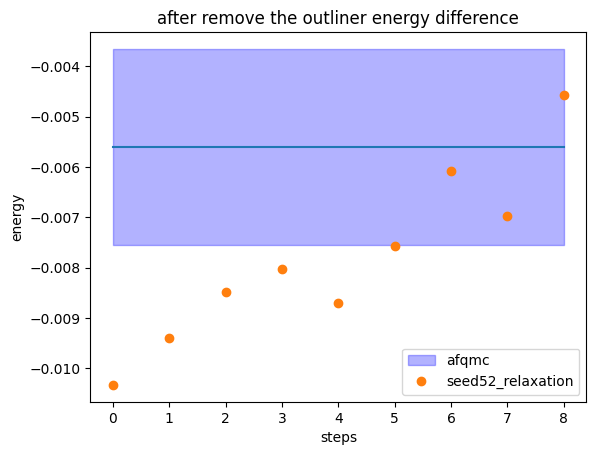

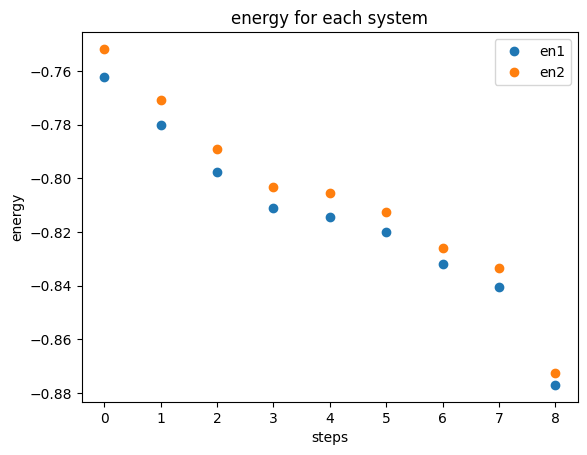

In [7]:
### new step 7 energy after remove the outliner 
rlx_data = '''
# relaxation from mean-field object using 100 walkers
# rlx_step       system1_en      system2_en      en_diff
    0            -0.762049       -0.751719       -0.010331
    1            -0.780147       -0.770754       -0.009392
    2            -0.797634       -0.789149       -0.008484
    3            -0.811106       -0.803070       -0.008036
    4            -0.814336       -0.805636       -0.008700
    5            -0.820182       -0.812610       -0.007571
    6            -0.831913       -0.825825       -0.006088
    7            -0.840527       -0.833547       -0.006979
    8            -0.877062       -0.872486       -0.004575
# relaxation time: 26.37
'''

step = []
en_diff = []
en1 = []
en2 = []
lines = rlx_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 0:
            step.append(columns[0])
        if len(columns) > 1:
            en1.append(columns[1])
        if len(columns) > 2:
            en2.append(columns[2])
        if len(columns) > 3:
            en_diff.append(columns[3])

step = np.array(step,dtype='float32')
en1 = np.array(en1,dtype='float32')
en2 = np.array(en2,dtype='float32')
en_diff = np.array(en_diff,dtype='float32')


afqmc_en_diff = -0.005606581337333716
afqmc_en_diff_err = 0.0019502384765517759
x_steps = np.linspace(0,max(step),100)
afqmc_en = np.array([afqmc_en_diff]*len(x_steps))
afqmc_lw = afqmc_en-afqmc_en_diff_err
afqmc_up = afqmc_en+afqmc_en_diff_err
plt.plot(x_steps,afqmc_en)
plt.fill_between(x_steps, afqmc_lw, afqmc_up, color='blue', alpha=0.3, label='afqmc')
plt.plot(step,en_diff,'o',label='seed52_relaxation')
#plt.errorbar(prop_steps,prop_en_diff,yerr=prop_en_diff_err, fmt='o', capsize=5,label='ucs_prop')
plt.xlabel('steps')
plt.ylabel('energy')
plt.title('after remove the outliner energy difference')
plt.legend()
plt.show()


plt.plot(step,en1,'o',label='en1')
plt.plot(step,en2,'o',label='en2')
plt.xlabel('steps')
plt.ylabel('energy')
plt.title('energy for each system')
plt.legend()
plt.show()

[-0.010331]
post relaxation propagation energy difference: [-0.00924  -0.008208 -0.007341 -0.006682 -0.005923 -0.006245 -0.005869
 -0.005771 -0.005541 -0.005999 -0.005081 -0.005831 -0.005992 -0.005842
 -0.006361 -0.006183 -0.006519 -0.006016 -0.006593 -0.006838 -0.00681
 -0.00686  -0.006998 -0.007335 -0.008487 -0.006693 -0.005542 -0.006052
 -0.006115 -0.00654 ]
energy difference error: [2.600e-05 5.200e-05 8.900e-05 1.280e-04 1.950e-04 1.460e-04 2.500e-04
 2.330e-04 2.720e-04 3.800e-04 4.630e-04 3.440e-04 2.530e-04 3.120e-04
 3.170e-04 3.880e-04 3.270e-04 3.730e-04 4.300e-04 3.210e-04 3.900e-04
 7.230e-04 4.580e-04 5.570e-04 2.451e-03 3.750e-04 5.440e-04 4.370e-04
 6.590e-04 5.410e-04]
uncorrelated afqmc energy error: 0.0019502384765517759


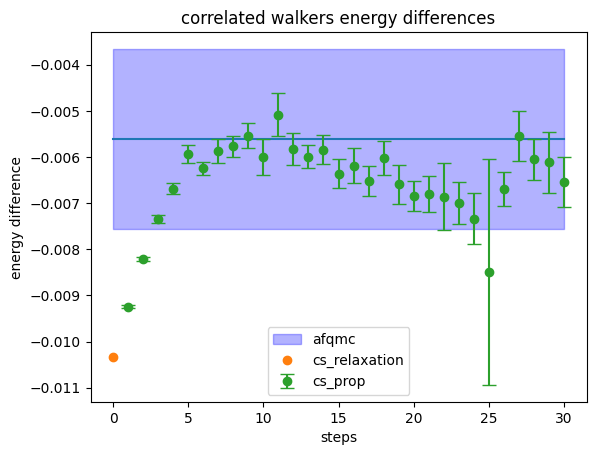

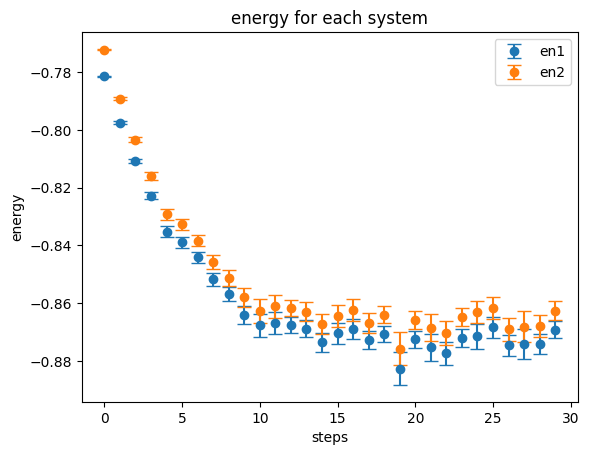

In [3]:
rlx_data = '''
# relaxation from mean-field object using 100 walkers
# rlx_step       system1_en      system2_en      en_diff
    0            -0.762049       -0.751719       -0.010331
# relaxation time: 3.55
'''

prop_data = '''
# correlated sampling
# tot_walkers: 100, propagation steps: 30, number of independent runs: 100
# step   system1_en      error           system2_en      error           energy_diff     error
  1      -0.781482       0.000238        -0.772242       0.000261        -0.009240       0.000026
  2      -0.797480       0.000498        -0.789272       0.000542        -0.008208       0.000052
  3      -0.810743       0.000802        -0.803402       0.000877        -0.007341       0.000089
  4      -0.822741       0.001284        -0.816058       0.001395        -0.006682       0.000128
  5      -0.835218       0.001874        -0.829295       0.002024        -0.005923       0.000195
  6      -0.838928       0.001847        -0.832683       0.001949        -0.006245       0.000146
  7      -0.844175       0.001881        -0.838307       0.002057        -0.005869       0.000250
  8      -0.851645       0.002271        -0.845874       0.002395        -0.005771       0.000233
  9      -0.856835       0.002530        -0.851294       0.002749        -0.005541       0.000272
  10     -0.863985       0.003095        -0.857985       0.003295        -0.005999       0.000380
  11     -0.867707       0.003822        -0.862627       0.004175        -0.005081       0.000463
  12     -0.866846       0.003773        -0.861015       0.004025        -0.005831       0.000344
  13     -0.867674       0.002753        -0.861682       0.002906        -0.005992       0.000253
  14     -0.868775       0.003067        -0.862933       0.003266        -0.005842       0.000312
  15     -0.873533       0.003272        -0.867172       0.003326        -0.006361       0.000317
  16     -0.870470       0.003616        -0.864287       0.003816        -0.006183       0.000388
  17     -0.868892       0.003579        -0.862373       0.003775        -0.006519       0.000327
  18     -0.872770       0.003221        -0.866754       0.003445        -0.006016       0.000373
  19     -0.870527       0.002763        -0.863934       0.002978        -0.006593       0.000430
  20     -0.882606       0.005683        -0.875768       0.005716        -0.006838       0.000321
  21     -0.872547       0.003039        -0.865737       0.003197        -0.006810       0.000390
  22     -0.875328       0.004547        -0.868468       0.004770        -0.006860       0.000723
  23     -0.877396       0.004018        -0.870398       0.004144        -0.006998       0.000458
  24     -0.872018       0.003057        -0.864683       0.003161        -0.007335       0.000557
  25     -0.871522       0.004179        -0.863035       0.003854        -0.008487       0.002451
  26     -0.868291       0.003597        -0.861598       0.003780        -0.006693       0.000375
  27     -0.874634       0.003746        -0.869092       0.003915        -0.005542       0.000544
  28     -0.874120       0.005043        -0.868068       0.005303        -0.006052       0.000437
  29     -0.874004       0.003498        -0.867888       0.003821        -0.006115       0.000659
  30     -0.869121       0.003039        -0.862582       0.003202        -0.006540       0.000541
'''

rlx_en_diff = []
lines = rlx_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 3:
            rlx_en_diff.append(columns[3])

rlx_en_diff = np.array(rlx_en_diff,dtype='float32')
print(f'{rlx_en_diff}')

prop_en_diff = []
prop_en_diff_err = []
lines = prop_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 5:
            prop_en_diff.append(columns[5])
        if len(columns) > 6:
            prop_en_diff_err.append(columns[6])

prop_en_diff = np.array(prop_en_diff,dtype='float32')
print(f'post relaxation propagation energy difference: {prop_en_diff}')
prop_en_diff_err = np.array(prop_en_diff_err,dtype='float32')
print(f'energy difference error: {prop_en_diff_err}')

rlx_steps = np.arange(len(rlx_en_diff))
prop_steps = np.arange(len(rlx_en_diff),len(rlx_en_diff)+len(prop_en_diff))

afqmc_en_diff = -0.005606581337333716
afqmc_en_diff_err = 0.0019502384765517759
print(f'uncorrelated afqmc energy error: {afqmc_en_diff_err}')
x_steps = np.linspace(0,max(prop_steps),100)
afqmc_en = np.array([afqmc_en_diff]*len(x_steps))
afqmc_lw = afqmc_en-afqmc_en_diff_err
afqmc_up = afqmc_en+afqmc_en_diff_err
plt.plot(x_steps,afqmc_en)
plt.fill_between(x_steps, afqmc_lw, afqmc_up, color='blue', alpha=0.3, label='afqmc')
plt.plot(rlx_steps,rlx_en_diff,'o',label='cs_relaxation')
plt.errorbar(prop_steps,prop_en_diff,yerr=prop_en_diff_err, fmt='o', capsize=5,label='cs_prop')
plt.xlabel('steps')
plt.ylabel('energy difference')
plt.title('correlated walkers energy differences')
plt.legend()
plt.show()

en1 = []
err1 = []
en2 = []
err2 = []

lines = prop_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            en1.append(columns[1])
        if len(columns) > 2:
            err1.append(columns[2])
        if len(columns) > 3:
            en2.append(columns[3])
        if len(columns) > 4:
            err2.append(columns[4])

en1 = np.array(en1,dtype='float32')
err1 = np.array(err1,dtype='float32')
en2 = np.array(en2,dtype='float32')
err2 = np.array(err2,dtype='float32')
prop_steps = np.arange(len(en1))

plt.errorbar(prop_steps,en1,yerr=err1, fmt='o', capsize=5,label='en1')
plt.errorbar(prop_steps,en2,yerr=err2, fmt='o', capsize=5,label='en2')
plt.xlabel('steps')
plt.ylabel('energy')
plt.title('energy for each system')
plt.legend()
plt.show()

In [ ]:
last_step = '''
# debug the big uncertainty step 25
# run    sys1_en         sys2_en         en_diff
  1      -0.857813       -0.850573       -0.007240
  2      -0.850279       -0.843317       -0.006962
  3      -0.874944       -0.867345       -0.007599
  4      -0.858143       -0.834264       -0.023879
  5      -0.936475       -0.927375       -0.009100
  6      -0.875779       -0.872520       -0.003259
  7      -0.848832       -0.838399       -0.010433
  8      -0.843218       -0.835293       -0.007926
  9      -0.847785       -0.841611       -0.006174
  10     -0.904219       -0.897280       -0.006939
  11     -0.846080       -0.838567       -0.007513
  12     -0.830586       -0.821874       -0.008712
  13     -0.889855       -0.881353       -0.008501
  14     -0.929673       -0.922278       -0.007395
  15     -0.854985       -0.846311       -0.008674
  16     -0.860137       -0.854124       -0.006013
  17     -0.858847       -0.850154       -0.008692
  18     -0.976322       -1.005967       0.029645
  19     -0.854543       -0.847004       -0.007540
  20     -0.885248       -0.873604       -0.011644
  21     -0.931247       -0.927318       -0.003929
  22     -0.849268       -0.838487       -0.010780
  23     -0.885057       -0.877525       -0.007531
  24     -0.868072       -0.861975       -0.006097
  25     -0.827818       -0.819279       -0.008539
  26     -0.817536       -0.807776       -0.009760
  27     -0.871832       -0.864676       -0.007156
  28     -0.832512       -0.824344       -0.008167
  29     -0.841543       -0.833479       -0.008064
  30     -0.863523       -0.854977       -0.008546
  31     -0.886048       -0.879408       -0.006640
  32     -0.867919       -0.860231       -0.007688
  33     -0.859850       -0.853492       -0.006358
  34     -0.845109       -0.836422       -0.008687
  35     -0.870556       -0.860026       -0.010530
  36     -0.895530       -0.888639       -0.006891
  37     -0.829786       -0.821141       -0.008645
  38     -0.897882       -0.891154       -0.006727
  39     -0.880681       -0.878222       -0.002459
  40     -0.871867       -0.863030       -0.008837
  41     -0.844505       -0.838398       -0.006107
  42     -0.900883       -0.897981       -0.002902
  43     -0.854922       -0.847074       -0.007848
  44     -0.863754       -0.859300       -0.004455
  45     -0.836302       -0.828877       -0.007425
  46     -0.866642       -0.859802       -0.006840
  47     -0.853646       -0.846685       -0.006960
  48     -0.895749       -0.890288       -0.005461
  49     -0.872338       -0.865376       -0.006962
  50     -0.841764       -0.834303       -0.007462
  51     -0.840834       -0.833948       -0.006885
  52     -0.849731       -0.840634       -0.009097
  53     -0.855383       -0.845530       -0.009853
  54     -0.858277       -0.848064       -0.010213
  55     -0.884274       -0.874354       -0.009920
  56     -0.925476       -0.926385       0.000909
  57     -0.879726       -0.873439       -0.006287
  58     -0.852898       -0.847085       -0.005813
  59     -1.109353       -0.866024       -0.243329
  60     -0.832286       -0.824156       -0.008130
  61     -0.890880       -0.883187       -0.007692
  62     -0.932201       -0.931662       -0.000539
  63     -0.834044       -0.827693       -0.006350
  64     -0.892963       -0.885930       -0.007032
  65     -0.966185       -0.999285       0.033100
  66     -0.873466       -0.866320       -0.007146
  67     -0.848990       -0.840679       -0.008311
  68     -0.914143       -0.910909       -0.003233
  69     -0.906234       -0.903979       -0.002255
  70     -0.848358       -0.840981       -0.007377
  71     -0.879306       -0.872619       -0.006687
  72     -0.869213       -0.858898       -0.010315
  73     -0.860768       -0.855521       -0.005247
  74     -0.829261       -0.820818       -0.008443
  75     -0.837481       -0.830871       -0.006611
  76     -0.835128       -0.826557       -0.008571
  77     -0.855155       -0.849723       -0.005432
  78     -0.845400       -0.838002       -0.007398
  79     -0.839508       -0.832369       -0.007139
  80     -0.923252       -0.919465       -0.003787
  81     -0.822410       -0.814078       -0.008332
  82     -0.839758       -0.831989       -0.007769
  83     -0.829348       -0.822157       -0.007192
  84     -0.906419       -0.903910       -0.002509
  85     -0.863421       -0.856233       -0.007188
  86     -0.820866       -0.813425       -0.007441
  87     -0.835083       -0.828389       -0.006694
  88     -1.001330       -1.002323       0.000994
  89     -0.825406       -0.816765       -0.008642
  90     -0.945639       -0.954445       0.008807
  91     -0.853839       -0.846087       -0.007752
  92     -0.870920       -0.865060       -0.005860
  93     -0.873401       -0.870263       -0.003139
  94     -0.862131       -0.840918       -0.021213
  95     -0.860626       -0.852528       -0.008098
  96     -0.886312       -0.881948       -0.004364
  97     -0.861904       -0.854494       -0.007410
  98     -0.851344       -0.845838       -0.005506
  99     -0.875545       -0.883247       0.007702
  100    -0.888420       -0.885449       -0.002971
# system1 energy: -0.871522
# system2 energy: -0.863035
# energy difference: -0.008487
# total run time: 259.20
'''

samp_en1 = []
samp_en2 = []
samp_diff = []

lines = last_step.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 1:
            samp_en1.append(columns[1])
        if len(columns) > 2:
            samp_en2.append(columns[2])
        if len(columns) > 3:
            samp_diff.append(columns[3])

samp_en1 = np.array(samp_en1,dtype='float32')
samp_en2 = np.array(samp_en2,dtype='float32')
samp_diff = np.array(samp_diff,dtype='float32')

plt.hist(samp_en1 , bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number')
plt.title('system1')
plt.show()
plt.hist(samp_en2, bins=30,edgecolor='black')
plt.xlabel('energy')
plt.ylabel('number')
plt.title('system2')
plt.show()
plt.hist(samp_diff, bins=30,edgecolor='black')
plt.xlabel('energy')
plt.ylabel('number')
plt.title('energy_diff')
plt.show()